In [1]:
import pandas as pd
import numpy as np
# import random
import scipy as sp
import time
import seaborn as sns
import matplotlib.pyplot as plt


noise_std = 0.001

df = pd.read_csv('Tomography - noise_' + str(noise_std) + ' - No of removed measurements_0.csv')

df = df.drop('Unnamed: 0', axis=1)

# df = df.sample(n=1000)

print(df)

X = df[["feature1", "feature2", "feature3", "feature4", "feature5", "feature6", "feature7", "feature8", "feature9", "feature10", "feature11", "feature12", "feature13", "feature14", "feature15", "feature16"]].to_numpy()

Y = df[["label1", "label2", "label3", "label4", "label5", "label6", "label7", "label8", "label9", "label10", "label11", "label12", "label13", "label14", "label15", "label16"]].to_numpy()



       feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0      0.273967  0.172364  0.207965  0.114659  0.149955  0.402588  0.157930   
1      0.432393  0.203068  0.262506  0.199625  0.116756  0.245350  0.182271   
2      0.213187  0.141846  0.232117  0.283793  0.243310  0.403843  0.532033   
3      0.201601  0.266530  0.345182  0.228136  0.285562  0.249775  0.118418   
4      0.253280  0.256640  0.167317  0.096897  0.243615  0.243914  0.179862   
...         ...       ...       ...       ...       ...       ...       ...   
99995  0.138460  0.087832  0.095676  0.005578  0.649837  0.123180  0.212684   
99996  0.052280  0.360448  0.071477  0.226190  0.132018  0.455200  0.046943   
99997  0.007012  0.081281  0.023183  0.058222  0.256939  0.651912  0.137899   
99998  0.065209  0.404066  0.086257  0.168511  0.047348  0.483253  0.166159   
99999  0.731695  0.001475  0.385803  0.397414  0.088374  0.178025  0.260164   

       feature8  feature9  feature10  ...    label7

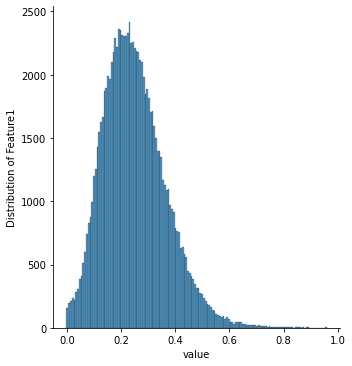

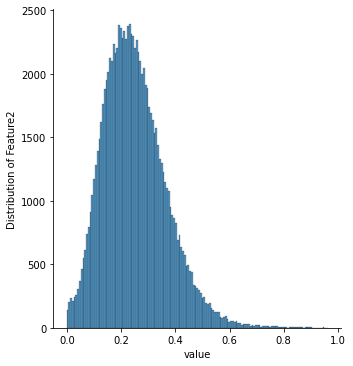

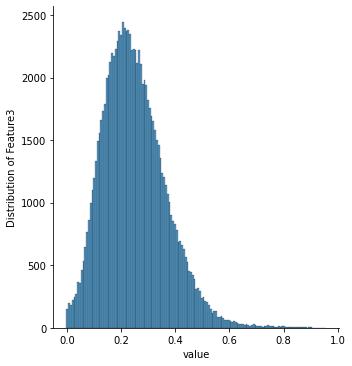

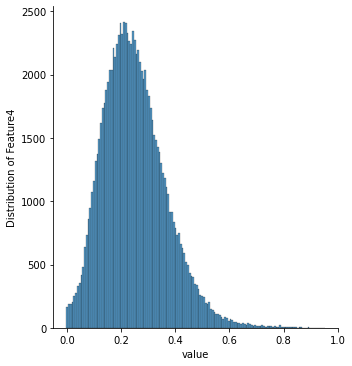

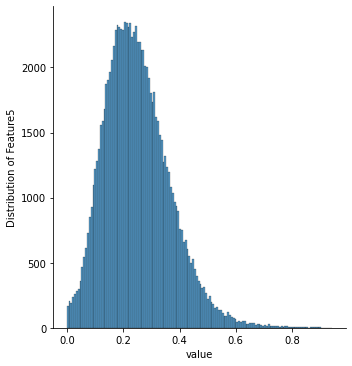

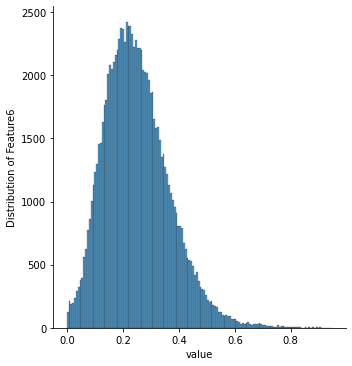

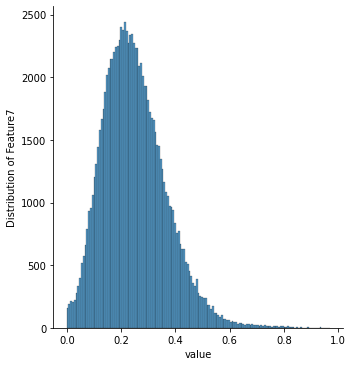

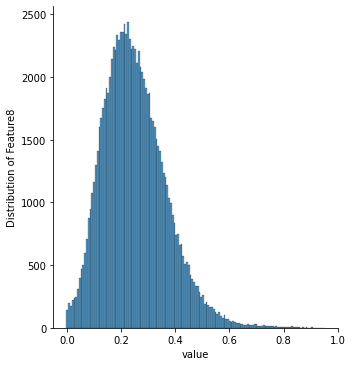

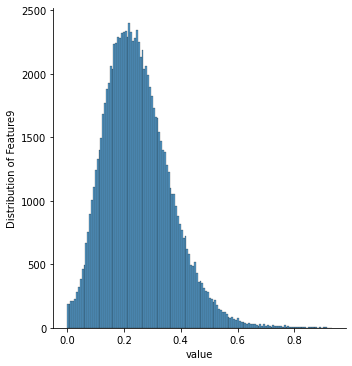

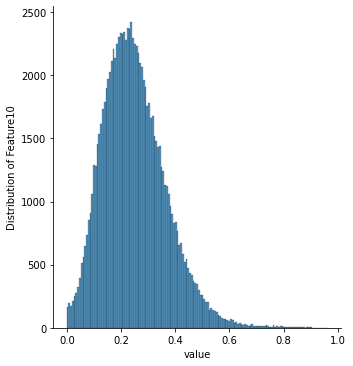

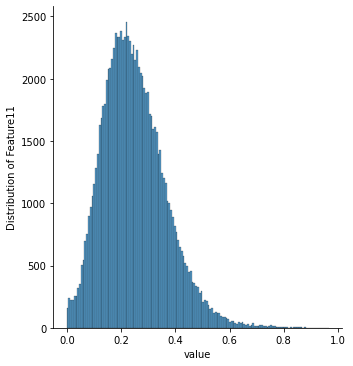

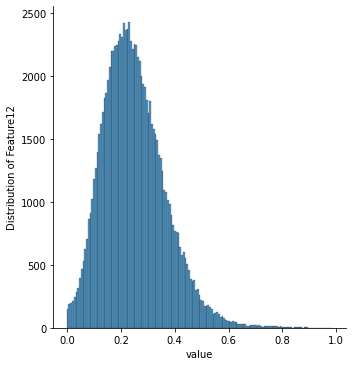

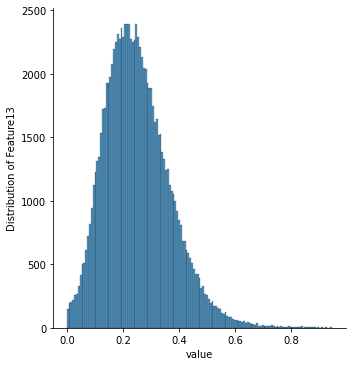

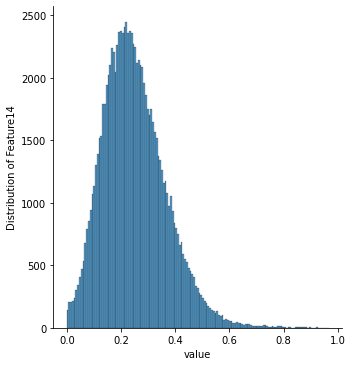

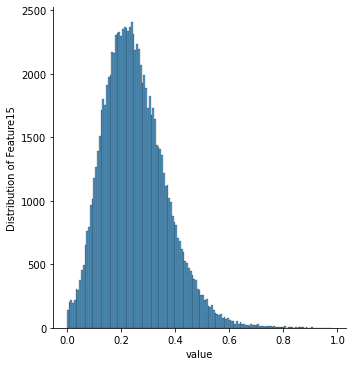

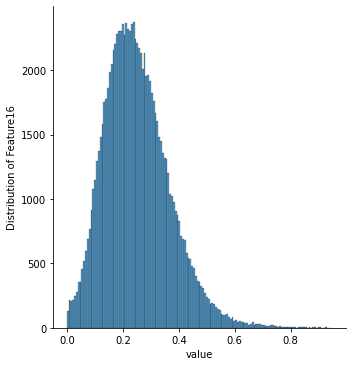

In [2]:
################################## Feature Distribution
for i in range(1, 17):

    feature = df['feature'+str(i)].to_numpy()

    sns.displot(feature)

    # print(np.var(feature))
    plt.xlabel('value')
    plt.ylabel('Distribution of Feature'+str(i))

    plt.savefig('Distribution of Feature' + str(i) + '.png')

In [37]:
################################## Feature Selection
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.inspection import permutation_importance


regr = MultiOutputRegressor(Ridge(random_state=123)).fit(X, Y)
regr.score(X, Y)

r = permutation_importance(regr, X, Y,  n_repeats=30, random_state=0)

importance = r.importances_mean


importance
# sns.displot(importance)

# # print(np.var(feature))
# plt.xlabel('Features')
# plt.ylabel('Importance')


# plt.savefig('Importance of Features')
# regr.predict(X[1].reshape(1, -1))-Y[1]
# selector = SelectFromModel(estimator=MultiOutputRegressor()).fit(X, Y)
# importance_of_features = selector.estimator_.coef_
# print(importance_of_features)

array([0.07911382, 0.08368352, 0.09562909, 0.09797733, 0.08182275,
       0.08187128, 0.09720486, 0.09777472, 0.09719424, 0.09815005,
       0.0959644 , 0.09783426, 0.09933344, 0.10050695, 0.0967515 ,
       0.09768291])

In [41]:
########################################## Correlation of Features

correlation_matrix = df[["feature1", "feature2", "feature3", "feature4", "feature5", "feature6", "feature7", "feature8", "feature9", "feature10", "feature11", "feature12", "feature13", "feature14", "feature15", "feature16"]].corr()

print(correlation_matrix)

           feature1  feature2  feature3  feature4  feature5  feature6  \
feature1   1.000000 -0.330504  0.333617  0.337271 -0.332745 -0.332992   
feature2  -0.330504  1.000000  0.331299  0.332384 -0.332202 -0.332196   
feature3   0.333617  0.331299  1.000000  0.328426 -0.331204 -0.329427   
feature4   0.337271  0.332384  0.328426  1.000000 -0.333148 -0.332176   
feature5  -0.332745 -0.332202 -0.331204 -0.333148  1.000000 -0.339187   
feature6  -0.332992 -0.332196 -0.329427 -0.332176 -0.339187  1.000000   
feature7  -0.329294 -0.336089 -0.330341 -0.330266  0.329694  0.331335   
feature8  -0.334326 -0.333490 -0.332183 -0.339885  0.329455  0.334023   
feature9   0.331519 -0.335250 -0.003387 -0.005933  0.336216 -0.332827   
feature10 -0.328994  0.329837 -0.001043  0.002032 -0.331228  0.330642   
feature11  0.004673 -0.005536  0.330987 -0.002547  0.001343 -0.000502   
feature12  0.002998 -0.005148 -0.007914  0.325951  0.001571  0.000501   
feature13  0.332059 -0.332496  0.004517  0.003054  